In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (3, 3)

In [3]:
config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-cabinets_selected-parties/{}",
    "nTopics": 100
}

usefulness_data = pd.read_excel(config.get('outDir').format('topics_100.xlsx'), index_col=0)
topic_coherence_data = pd.read_csv(config.get('outDir').format('topic_coherence_100.csv'), index_col=0)

data = pd.concat([usefulness_data, topic_coherence_data], axis=1)
#data

In [4]:
from collections import Counter

def vote(row):
    r = Counter()
    for v in row[['usefulness_A', 'usefulness_B', 'usefulness_C']]:
        r[v] += 1
    usef, freq = r.most_common(1)[0]
    if freq >= 2:
        return usef
    else:
        print row['words']
        return 2
    

data['mean_usefulness'] = data.apply(lambda row: np.mean(row[['usefulness_A', 'usefulness_B', 'usefulness_C']]),axis=1)
data['usefulness'] = data.apply(lambda row: vote(row), axis=1)
data.to_csv(config.get('outDir').format('topics_100_data.csv'), encoding='utf-8')

begroting visie cultuur terrein departement kennis ministerie bewindspersoon prioriteit begrotingsbehandeling
verzoek maand stemming agenda uitstel spoeddebat meerderheid bericht behoefte datum
begrip definitie grond onderscheid interpretatie term wetgeving minderheid discriminatie formulering
uitspraak standpunt interview beeld krant mond opvatting uitlating citaat media
bestuur convenant fusie medezeggenschap model zeggenschap personeel invloed autonomie maat


In [5]:
data

,words,usefulness_A,usefulness_B,usefulness_C,cap,ca,cp,cv,npmi,uci,umass,mean_usefulness,usefulness
0,draagvlak herindeling stad inwoner samenwerkin...,3,3,3,14,0.16317,0.16612,0.44352,-0.16858,-5.35646,-2.73341,3.000000,3
1,risico systeem effect voordeel prikkel nadeel ...,1,3,3,20,0.12887,-0.09130,0.56865,-0.20210,-6.22748,-2.85187,2.333333,3
2,argument bezwaar redenering argumentatie grond...,1,3,3,20,0.08233,0.02394,0.52150,-0.26799,-7.61658,-2.13820,2.333333,3
3,besluit oordeel notitie procedure beslissing b...,1,1,2,NaN,0.07648,-0.27249,0.57542,-0.31456,-8.72293,-4.78655,1.333333,1
4,auto weg verkeer kilometerheffing waterstaat f...,3,3,3,10,0.11367,-0.17543,0.56065,-0.18293,-5.79123,-4.71433,3.000000,3
5,ondersteuning aanbesteding hulp dienst budget ...,3,2,3,3,0.06760,-0.46730,0.57835,-0.23918,-6.72214,-7.49376,2.666667,3
6,grens buitenland verkeer principe lijn verschi...,1,1,1,NaN,0.22065,0.04654,0.32548,-0.27762,-7.77876,-2.54380,1.000000,1
7,ziekenhuis verzekeraar zorgverzekeraar premie ...,3,3,3,3,0.07175,-0.09219,0.69189,-0.18560,-6.03437,-2.29786,3.000000,3
8,bewindsman aanpak uitvoering resultaat inzet r...,1,1,2,NaN,0.11291,-0.23389,0.51310,-0.29855,-8.39318,-4.63982,1.333333,1
9,regel regelgeving fraude schip bureaucratie we...,1,2,2,NaN,0.13010,-0.38127,0.61924,-0.27872,-8.00416,-2.50298,1.666667,2


In [6]:
print 'usefulness', len([d for d in data['usefulness'] == 3 if d])
print 'usefulness_A', len([d for d in data['usefulness_A'] == 3 if d])

usefulness 54
usefulness_A 48


In [7]:
print data.loc[data['usefulness'] == 3, ['words', 'cap']]

                                                words  cap
0   draagvlak herindeling stad inwoner samenwerkin...   14
1   risico systeem effect voordeel prikkel nadeel ...   20
2   argument bezwaar redenering argumentatie grond...   20
4   auto weg verkeer kilometerheffing waterstaat f...   10
5   ondersteuning aanbesteding hulp dienst budget ...    3
7   ziekenhuis verzekeraar zorgverzekeraar premie ...    3
10  referendum verkiezing meerderheid democratie g...    2
19  markt consument marktwerking prijs concurrenti...    1
20  woning huurder corporatie wijk verhuurder huur...   14
21  leven ziekte arts protocol gezondheid euthanas...    3
22  baan arbeidsmarkt economie werkgelegenheid wer...    5
23  gezin budget kinderbijslag arbeid verlof partn...   13
24  justitie straf slachtoffer strafrecht misdrijf...   12
25  werkgever werknemer arbeid partner cao sector ...    5
26  dier verbod dierenwelzijn sector vlees slacht ...    4
29  belasting belastingplan tarief heffing verlagi...   

In [24]:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(data, measure, threshold=2):
    fpr, tpr, thr = roc_curve(data['mean_usefulness'] > threshold, data[measure])
    
    print 'AUC', roc_auc_score(data['mean_usefulness'] > threshold, data[measure])

    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Topic coherence using {}'.format(measure))
    plt.legend(loc="lower right")
    plt.show()

AUC 0.531409168081


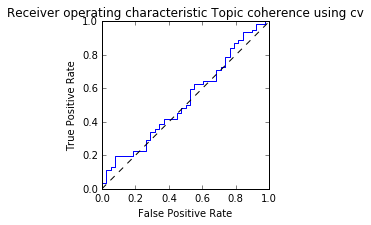

In [25]:
plot_roc_curve(data, 'cv')

ROC curve komt net boven random uit, dat is teleurstellend (maar niet geheel onverwachts).

Volgende stap is vergelijken vocabulaire lemma's uit frog vs. uit pattern.

Wat ook nog kan: andere measures proberen (alle opties uit palmetto, dat zijn er 6 ofzo)

In [26]:
plot_roc_curve(data, 'cv', threshold=3)

AUC

/home/jvdzwaan/.local/lib/python2.7/site-packages/sklearn/metrics/metrics.py:909: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

 AUC 0.510611205433


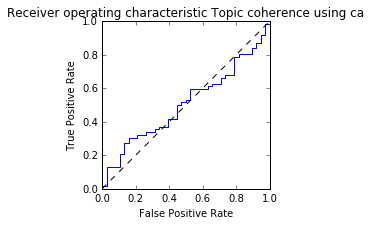

In [27]:
plot_roc_curve(data, 'ca')

AUC 0.730899830221


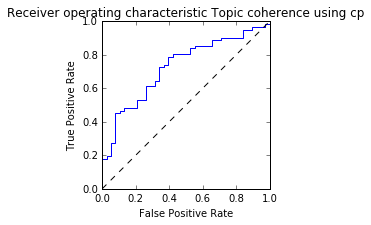

In [28]:
plot_roc_curve(data, 'cp')

AUC 0.788200339559


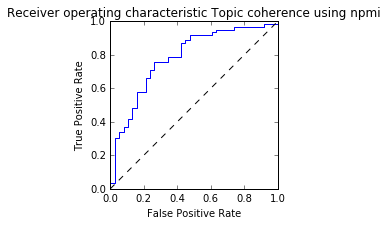

In [29]:
plot_roc_curve(data, 'npmi')

In [43]:
from scipy.spatial.distance import euclidean

fpr, tpr, thr = roc_curve(data['mean_usefulness'] > 2, data['npmi'])

min_dist = 1.0
for i, (fp, tp) in enumerate(zip(fpr, tpr)):
    d = euclidean([0.0, 1.0], [fp, tp])
    if d < min_dist:
        min_dist = d
        index = i

print min_dist
print 'threshold', thr[index]
print thr, np.mean(thr)

0.357470076955
threshold -0.21936
[ 0.08617  0.02865  0.02188 -0.01408 -0.01608 -0.04754 -0.06249 -0.07589
 -0.07634 -0.07934 -0.09684 -0.09938 -0.10028 -0.10387 -0.10975 -0.12199
 -0.12336 -0.12635 -0.12642 -0.1284  -0.12971 -0.1298  -0.13151 -0.13201
 -0.13205 -0.14304 -0.14812 -0.15228 -0.15751 -0.15858 -0.16332 -0.16369
 -0.16858 -0.17355 -0.17644 -0.17751 -0.17821 -0.18116 -0.18293 -0.1856
 -0.18795 -0.19037 -0.19085 -0.19275 -0.19449 -0.19582 -0.2021  -0.20293
 -0.20551 -0.20568 -0.20597 -0.20836 -0.20927 -0.20957 -0.21107 -0.21147
 -0.21936 -0.21944 -0.22116 -0.22606 -0.22801 -0.22858 -0.23083 -0.23266
 -0.23832 -0.23918 -0.23959 -0.24036 -0.2408  -0.24401 -0.24943 -0.25212
 -0.25287 -0.25517 -0.25808 -0.25976 -0.26081 -0.26453 -0.26626 -0.2675
 -0.26799 -0.26888 -0.27033 -0.2722  -0.27316 -0.27532 -0.27762 -0.27858
 -0.27872 -0.28264 -0.29337 -0.29646 -0.29812 -0.29855 -0.30298 -0.31227
 -0.31456 -0.31535 -0.31977 -0.34037] -0.1943359


AUC 0.774193548387


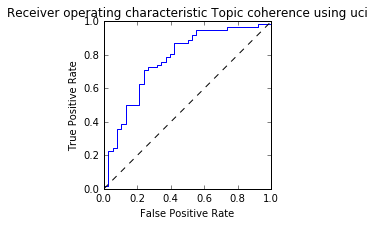

In [30]:
plot_roc_curve(data, 'uci')

AUC 0.569185059423


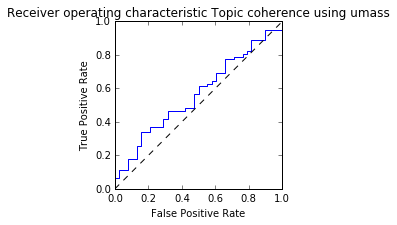

In [31]:
plot_roc_curve(data, 'umass')